# working on MNIST dataset using ANN
it is collection of 70k images,,,ie;handwritten digits photos are inside MNIST dataset
each photos contains one handwritten digit (0 to 7)

and resolution of each photo is 28x28   ie;28 rows and 28 pixel in each row  ie;28x28=784  total 784 pixels are there in 1 photo

In [1]:
#and whenever we are working on multiclass classification problem ,suppose output feature has 4 distict values 
#cat,dog,human,god then 4 node/perceptron/neuron are created in output layer
#ie;for n'classes in output feature n perceptron are created in ANN


In [2]:
#binary classification means-->exactly 2 distinct value in o/p feature...here value means class
#multiclass classification means-->more than 2 distict value in o.p feature here value means class
#regression -->continuous values in o/p features..here value means int,float ...etc

In [3]:
#therefore in output feature there are 10 distinct values,,,0 to 9 sooo 10 nodes are created at o/p layer

In [4]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [5]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()#inbuild dataset

In [6]:
X_train.shape,X_test.shape
#as u see 3d numpy array(means like C array/java array ie;stored in contiguous manner)..
#each photo/image is of resolution 28x28 and 60k such a photos are there in X_train,,remaining 10k are in X_test

((60000, 28, 28), (10000, 28, 28))

In [7]:
y_train.shape,y_test.shape
#is 1d numpy array,,which holds actual digit present in respective photo

((60000,), (10000,))

In [8]:
# X_train
# """[[0, 0, 0, ..., 0, 0, 0],
#         [0, 0, 0, ..., 0, 0, 0],
#         [0, 0, 0, ..., 0, 0, 0],
#         ...,
#         [0, 0, 0, ..., 0, 0, 0],
#         [0, 0, 0, ..., 0, 0, 0],
#         [0, 0, 0, ..., 0, 0, 0]],  first photo's pixel values ie;28x28=>784 pixel values(0 to 255)
# """

In [9]:
X_train[0]
#1st photo's pixel values,,,

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
y_train[0]
#as u see digit present in this 1st photo is 5

5

value present inside this image is 5


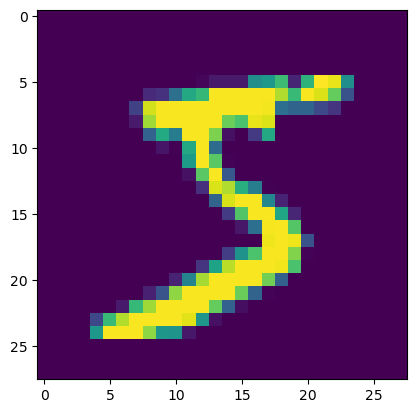

In [11]:
#u want to see image/phot
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
#as u see handwritten image ,,,and value present inside first image is 5
print('value present inside this image is',y_train[0])

value present inside this image is 0


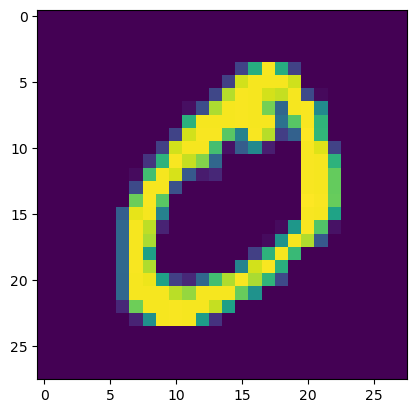

In [12]:
plt.imshow(X_train[1])
#as u see handwritten image ,,,and value present inside first image is 0
print('value present inside this image is',y_train[1])

value present inside this image is 4


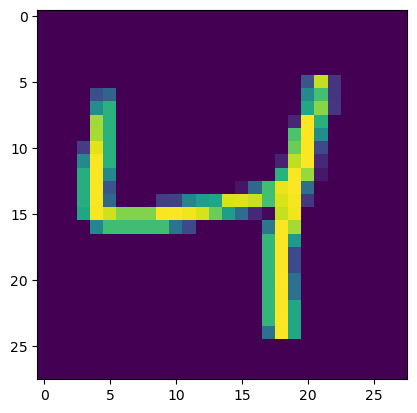

In [13]:
plt.imshow(X_train[2])
#as u see handwritten image ,,,and value present inside first image is 5
print('value present inside this image is',y_train[2])

In [14]:
#now we create neural network(NN),,bcz created by programmer so ANN and this is nothin but MLP(bcz more than 1 perceptron 
#is used and in diff diff layer)

In [15]:
#note-->for training of NN,,we have to scaled data to work and converge well(find weights and bias correctly any fastly)
#dont use StandardScaler,or...etc scaler
#divide the X_train adn X_test by 255 ,,so thar each pixel value come in range b/n 0-1
#0 for black,,,,1 for white and intermediate represents other colors
#VVVVVVVIMPPPP

In [16]:
X_train=X_train/255
X_test=X_test/255

In [17]:
X_train[0]
#as u see each pixel value ranges b/n 0 to 1
#and below is 2d numpy array,,28x28

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# CREATING ANN(ARTIFICIAL NEURAL NETWORK) AND TRAIN

In [18]:
model=Sequential()

In [19]:
#at a time we have to give 1 image ie;of 28x28  which is 2d,,,each photo has total 784 value(pixel value)
#but we have to give i/p parllely to each node ie;784 values are given as i/p parllely soo,,,,convert 2d representation of photo to 1d
#using Flatten method,.....convertinh high dimension to low dimension

In [20]:
model.add(Flatten(input_shape=(28,28)))#2d data converted to 1d
#ie;intially data is like this-->
# row0
#    row1
#    row2
#    .
#    .
#    .
#    .
#    row27      each row contains 28 column   thus 28x28  ie;2d
   
#    but after Flatten
   
#    row0 + row1 + row2 +........+row27    (1d array with 784 element(each pixel value))
   
#    thus 784 i/p values given parllely to each node/perceptrons




In [21]:
#create a H.L 1 with 128 nodes(randomly choosen)

model.add(Dense(128,activation='relu'))#no need to give no of inputs,,bcz o/p of Flatten is feeded to this layer(H.L1)
#you can add multiple H.Layers....to make model to extract feature deeply so named deep learning,,
#as u increase hidden layers(H.L) ,,model will start capturing deep feature of i.p data,,,so prediction is accurate,,,,,
#if u  give more no of layers then model may OVERFITT also
#if u dont  give more no of layers then model may UNDERFITT also(DONT LEARN CONCEPT FROM DATA) 
#but we use single H.L,,after we can change if we wants

#o/p layer--->bcz 10 ouputs are there 0,1,2....9  so we have to create 10 nodes.perceptron in o.p layer
model.add(Dense(10,activation='softmax'))#NOTE-->if output layer has more than 1 nodes then u have to use 'softmax' as activation function

#Bias and weights are calculated internally

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
 #flatten (Flatten)           (None, 784)               0      ->Flatten is i/p layer,i/p layer dont have any perceptron bcz,,we are not going to do any operation on i/p ,ie;not going to train  
                                                                 
 #dense (Dense)               (None, 128)               100480 ->hidden layer(H.L 1) ...from here actually trainig start on i/p data  
                                                                 
 #dense_1 (Dense)             (None, 10)                1290   ->o/p layer(is also kind of hidden layer)
#bcz ANN internally do operations w/o human intervation and it doesnt describe how operation is performed ,,it just give o/p
#internally so,,named hidden layer
                                                            

In [24]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')#there is another loss function which is littlebit same,categorical_crossentropy
#but small diff is-->in 'sparse_categorical_crossentropy' no need to do one hot encoding on o/p feature ie; our o/p
#labels are 0,1,2,3...9 ,,,so need to apply one hot encodingon it manually,,,internally it is done
#but in ''categorical_crossentropy' we have to manually do one hot encoding on o/p labels,,so use 
#'sparse_categorical_crossentropy' bcz it do internally

In [25]:
model.fit(X_train,y_train,epochs=10,validation_split=0.2)#from training data 20% dara is taken for validation purpose and remaining for training purpose
#ie;after training weights and bias are caluculated at each round/epochs and same is applied to validate the data on validation_data
#then model come to know ,,how much accurate prediction on validation data,,and if not better then model will imrove learning from it
#and after 10th round/epochs,,,model calculated the final weights and bias,,and use to predict hte test data while testing phase


#VVVVIIIMMMPPP
#u can add metrics=['accuracy'] to track accuracy at each epochs and we can assign training parameters to variable
#History=model.fit(X_train,y_train,epochs=10,validation_split=0.2,metrics=['accuracy'])
#and u can plot loss, accuracy,validation loss and accuracy to show at each epochs how loss and accuracy is behaving

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2916 - val_loss: 0.1589
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1313 - val_loss: 0.1210
Epoch 3/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0905 - val_loss: 0.0949
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0672 - val_loss: 0.0992
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0513 - val_loss: 0.0906
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0398 - val_loss: 0.0912
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0318 - val_loss: 0.0877
Epoch 8/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0253 - val_loss: 0.0833
Epoch 9/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0208 - val_loss: 0.0892
Epoch 10/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.018

In [26]:
# as u see val_loss is very very minimum/ we say negligible

# MODEL TESTING PHASE

In [27]:
y_prob=model.predict(X_test)
y_prob#each o/p nodes probability,,,/100 u do for range b/n 0 to 1

313/313 [==============================] - 1s 2ms/step


array([[5.8752043e-08, 3.1698008e-10, 1.3929706e-06, ..., 9.9927992e-01,
        2.5018593e-07, 2.7639549e-05],
       [1.8971271e-11, 2.6070532e-07, 9.9999976e-01, ..., 6.0667337e-18,
        2.2341516e-11, 7.6089243e-18],
       [1.4771135e-07, 9.9979550e-01, 5.0943923e-05, ..., 2.2729817e-05,
        1.0976217e-04, 5.4167309e-08],
       ...,
       [2.6680844e-16, 2.9014795e-13, 2.1805197e-16, ..., 5.2641731e-09,
        1.3241380e-11, 8.7612058e-08],
       [7.8885146e-13, 1.4406842e-11, 1.0832513e-16, ..., 4.3504230e-13,
        5.4790267e-08, 1.7529470e-15],
       [9.6090965e-12, 9.5637081e-17, 4.5187161e-12, ..., 2.2428283e-18,
        3.3454847e-14, 3.8630722e-16]], dtype=float32)

In [28]:
#first imagae of test data
#[[5.8752043e-08, 3.1698008e-10, 1.3929706e-06, ..., 9.9927992e-01,2.5018593e-07, 2.7639549e-05],
# p(0)           p(1)           p(2)                 p(7)          p(8)           p(9)
#p(0)->probability of the value present inside this first image can be 0,,,,,ie;5.87/100=>0.058 is probability
#as u see probability of the value present inside this first image can be 7, is high,,,ie;9.99/100=>0.099

In [29]:
y_pred=y_prob.argmax(axis=1)#max probability value of each row
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [30]:
#as u see the value present inside X_test[0] ie;first image of X_test data is predicted to be 7
#as u see the value present inside X_test[1] ie;second image of X_test data is predicted to be 2

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9767

In [32]:
# see 97% is accuracy,,which is great
#w/o any hyperparameter tuning,,and increasing nodes,layers,epochs,,,etc  our accuracy is high
#thus u can increase accuracy by  performing above methods

actual value present inside this image is 7
predicted value  7


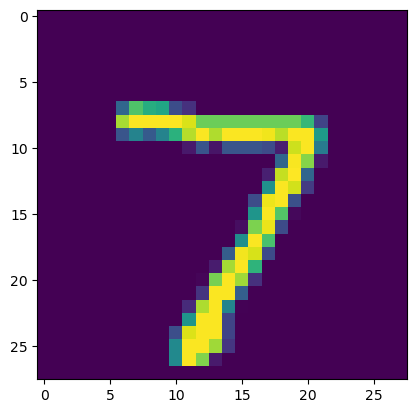

In [33]:
plt.imshow(X_test[0])
print('actual value present inside this image is',y_test[0])
print('predicted value ',y_pred[0])

In [34]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)#this is another way to predict single data

1/1 [==============================] - 0s 37ms/step


array([7], dtype=int64)

In [35]:
model.predict(X_test[2].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 38ms/step


array([1], dtype=int64)

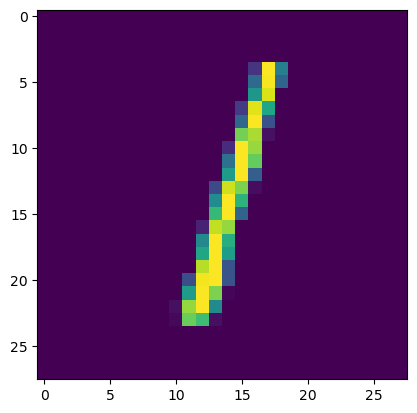

In [36]:
plt.imshow(X_test[2])

# CNN perform excellent on image data